---

<H1 align="center"> CS project : digital-twin  </H1>

---

<p align="center"> Maxime DUVAL-PREVOSTEAU, Karim ZAIDI </p>

### Table of contents

- [Project presentation](#project_presentation)
- [How we worked](#work)
- [Our solution](#solution)
    - [Principle](#principle)
    - [Example](#example)
- [Self_assessment](#self_assessment)

## Project presentation <a class="anchor" id="project_presentation"></a>

For your second CS project, you are invited to collaborate with a pair to develop the following Python project.

The company of Mr. Guiblind used to deliver office buildings for decades, but modern buildings are getting "smarter", and in particular they are now expected to be delivered together with a *digital twin* in order to support connected scenarios. Typically, a digital twin can be summarized as an application that offers a virtual representation mirroring any physical elements of a building (*e.g.*, wall, door, floor), which are then composed to organize indoor areas (*e.g.*, room, patio, corridor). For example, a given room is designed from the combination of four walls, one containing a door and the others some windows. One of these walls can be shared with a corridor next to the office, etc. Both elements and areas may have specific attributes, but are all including a combination of coordinates to locate them in the building (the coordinates of an area corresponding to the bounding box of all contained assets or sub-areas). The digital twin is expected to live with the building—i.e., if new offices are designed, the digital twin is update accordingly.

This digital twin can then serve different purposes. For example, it can be visited to draw it on a map. For example, tracking a visitor whenever she enters an office at a given time. In that case, the office will keep track of the movements of visitors in order to maintain some statistics (e.g., occupation of the office along a given period of the day).

To better understand the effective usage of a building, we are interested in monitoring which areas are actually visited by people and assets. We assume that the digital twin is connected to an *indoor positioning system* (IPS) that can report on the asset locations reported as timestamped coordinates. Whenever such a position is detected, we want the digital twin to keep track of the associated areas that are visited (areas are not exclusive). To check the inclusion of a position in a potential area, it might be worth to compute the convex hull of an area from the coordinates of enclosed elements (hint: if you do not know how to compute a convex envelope in a 2D plan, [just ask Graham](https://letmegooglethat.com/?q=graham+convex+hul+algorithm)). 

For each of the monitored areas, we are interested in observing the `k` clusters among recorded locations to build some kind of heat map identifying the most popular places in a given area. To implement this feature, you can integrate or implement existing clustering algorithms, like [K-means](https://scikit-learn.org/stable/modules/clustering.html#k-means).

In the context of this project, we are only considering 2D representations of the building (i.e., maps), eventually separating the floors of the building as distinct maps. The elements of the building (e.g., walls) are assumed to have a thickness of `0`, meaning that both the coordinates of both extremities of a wall refers to the center. Hence, a graphical representation of the building would assume a default thickness. 

During the first part of this project, you are therefore invited to propose a Python encoding of the digital twin that Mr. Guiblind can configure whenever he delivers a new building to one of his customers. This digital twin should be delivered as a Git repository and come with a good coverage of the code base, and be developed by following the principles of TDD.

During the second part of this project, you are encouraged to apply the principle of clean code, as introduced above. It might also be relevant to propose a graphical representation of the maps, which can be simply ploted using matplotlib or any library that eases the drawing of maps.

During the third part of this project, you are encouraged to apply and document design patterns that you succeeded to apply to your code.

## How we worked <a class="anchor" id="work"></a>

To collaborate, we used messenger / discord to communicate and github to hold the source code.

To achieve our solution, we used TDD and tried to follow the clean code principles.

## Our solution <a class="anchor" id="solution"></a>

### Principle <a class="anchor" id="principle"></a>

Our solution is implemented based on the following class diagram : 

![Diagram](img/Class_Diagram.jpg)



### Example <a class="anchor" id="example"></a>

In [1]:
# setting path to import from different directories
import sys
sys.path.append("code")

# import
from Window import Window
from Wall import Wall
from Floor import Floor
from Element import Element
from Zone import Zone
from AtomicZone import AtomicZone
from Point import P
from Building import Building
from Door import Door
from CompositeZone import CompositeZone
from Area import Area
from Boundary import Boundary

import numpy as np

In [2]:
# building
building = Building('test building')
building.visualize()

Building is empty!


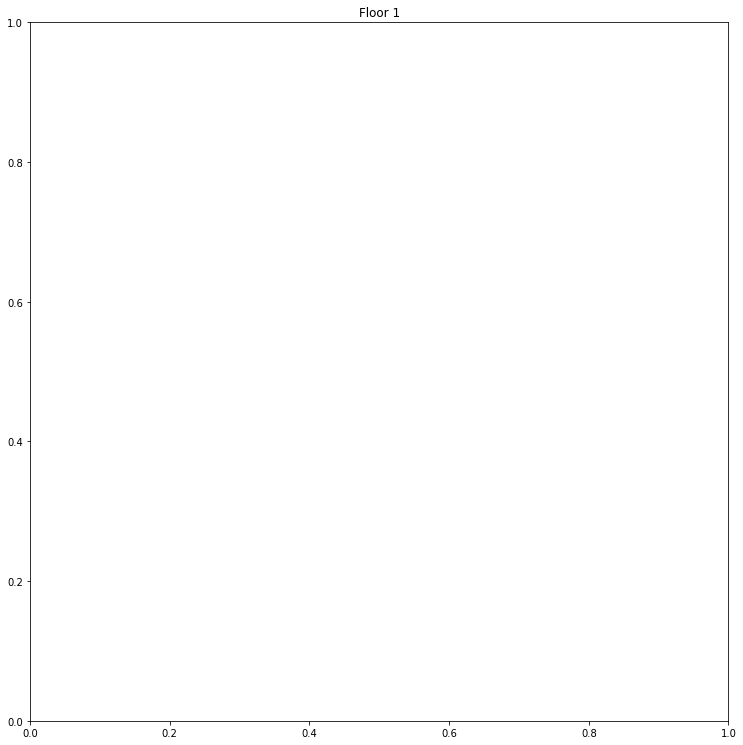

In [3]:
# create the floor
building.create_floor(1) # create only an empty floor
building.visualize()


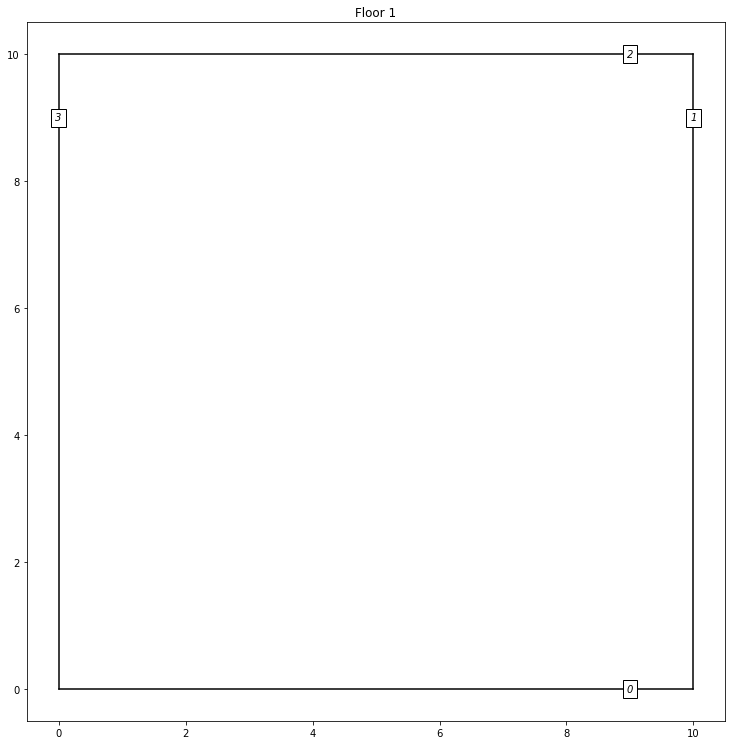

In [4]:
# 1st room
building.add_wall(1, P(0, 0), P(10,0))
building.add_wall(1, P(10, 0), P(10,10))
building.add_wall(1, P(10,10), P(0,10))
building.add_wall(1, P(0,10), P(0,0))
building.visualize()

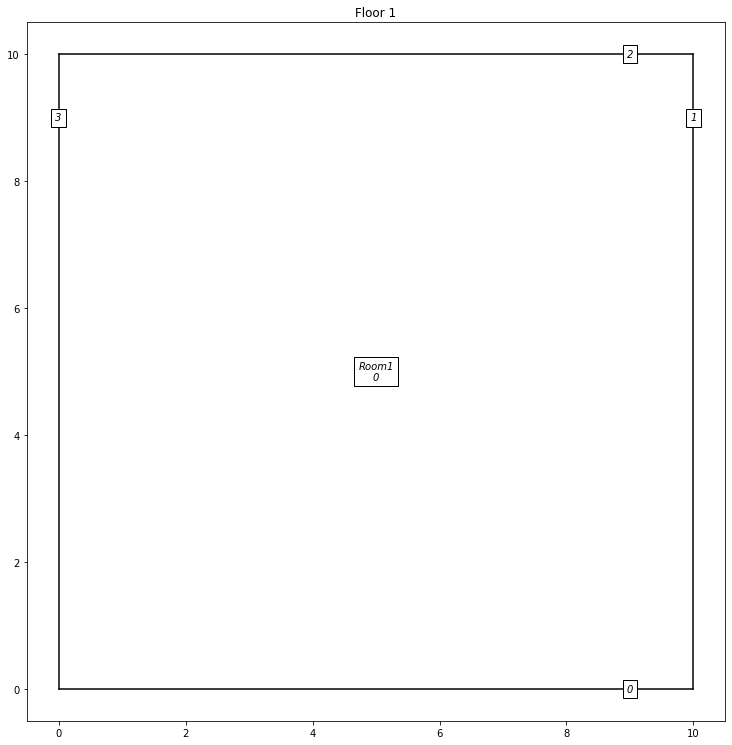

In [5]:
# 1st room
building.add_area(1, 'Room1', [0, 1, 2, 3])
building.visualize()

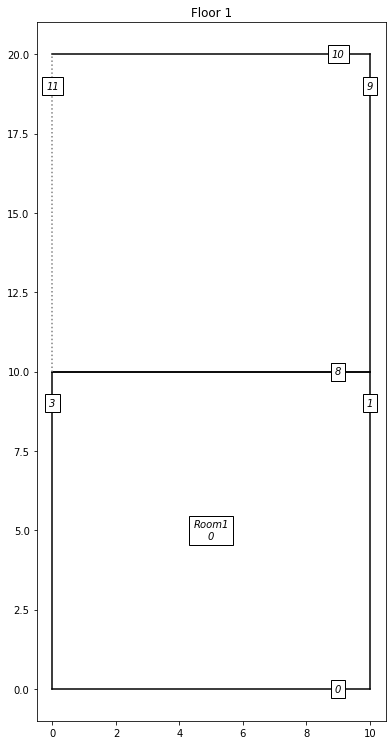

In [6]:
# walls for the 2nd room
building.add_wall(1, P(0, 10), P(10,10))
building.add_wall(1, P(10, 10), P(10,20))
building.add_wall(1, P(10,20), P(0,20))
building.add_boundary(1, P(0,20), P(0,10))
building.visualize()

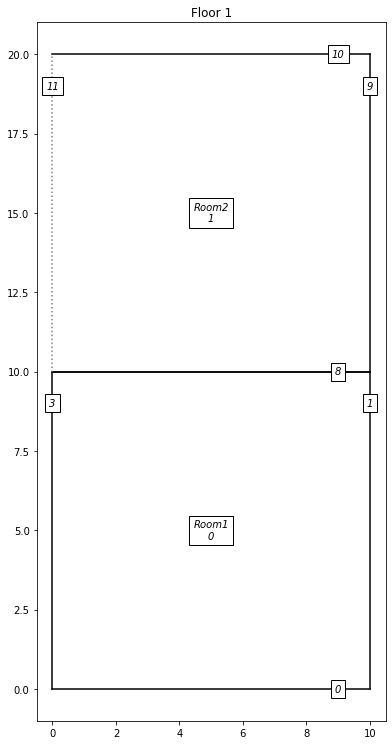

In [7]:
# 2nd room
building.add_area(1, 'Room2', [8, 9, 10, 11])
building.visualize()

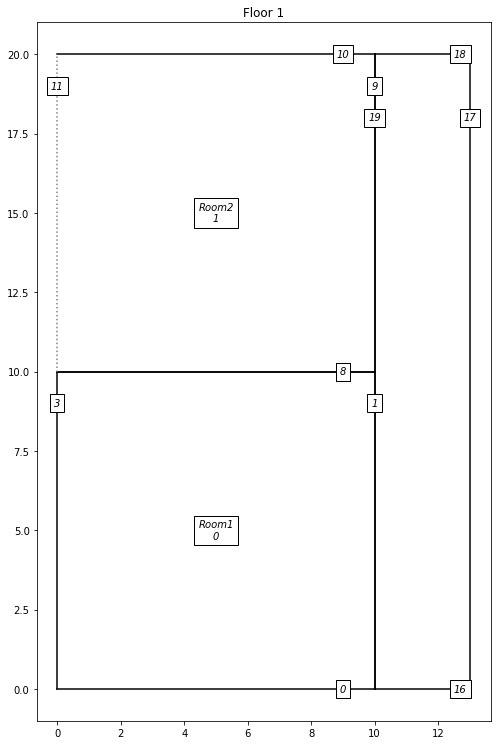

In [8]:
# walls for a corridor
building.add_wall(1, P(10, 0), P(13,0))
building.add_wall(1, P(13, 0), P(13,20))
building.add_wall(1, P(10, 20), P(13,20))
building.add_wall(1, P(10, 20), P(10,0))
building.visualize()

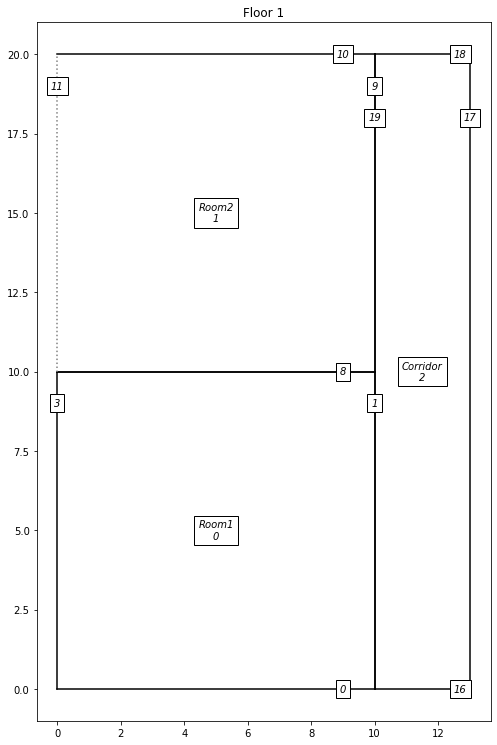

In [9]:
# corridor
building.add_area(1, 'Corridor', [16, 17, 18, 19])
building.visualize()

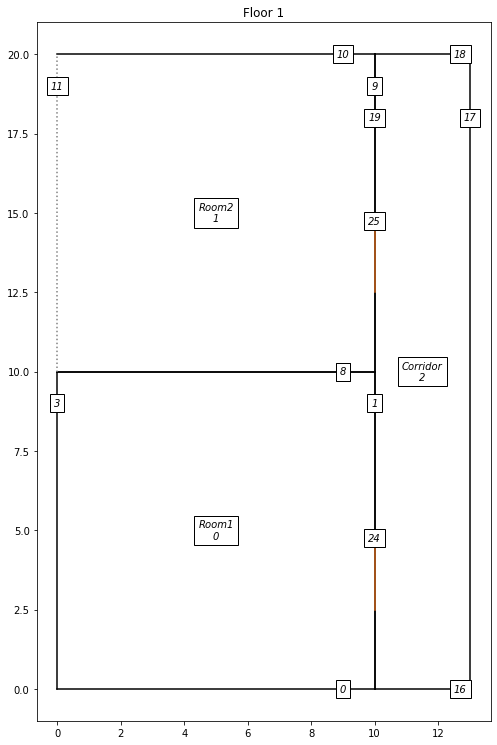

In [10]:
# add doors
building.add_door(1, 19, P(10, 2.5), P(10, 5))
building.add_door(1, 19, P(10, 12.5), P(10, 15))
building.visualize()

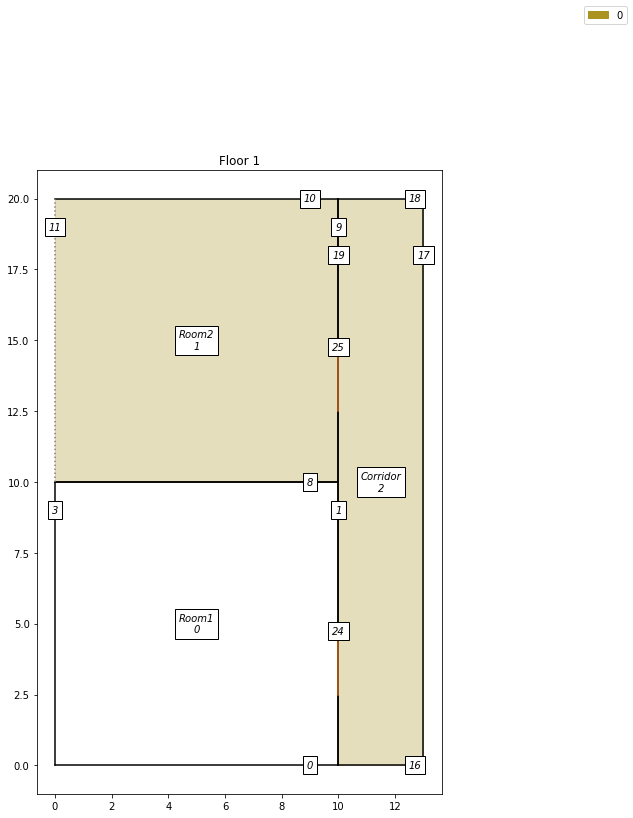

In [11]:
# testing zone
building.add_atomic_zone(1, areas=[1, 2])
building.visualize()

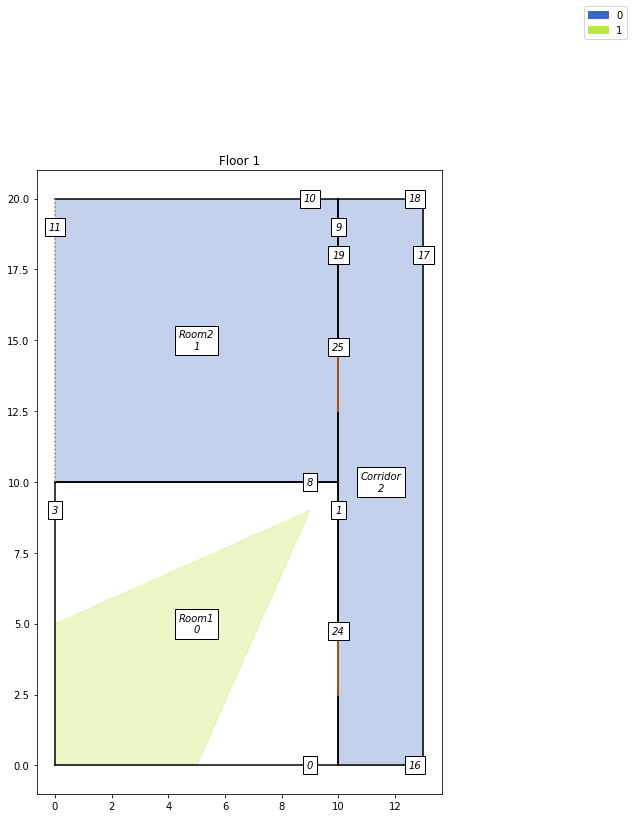

In [12]:
building.add_atomic_zone(1, polygon=[P(0,0),P(5,0),P(9,9),P(0,5)])
building.visualize()

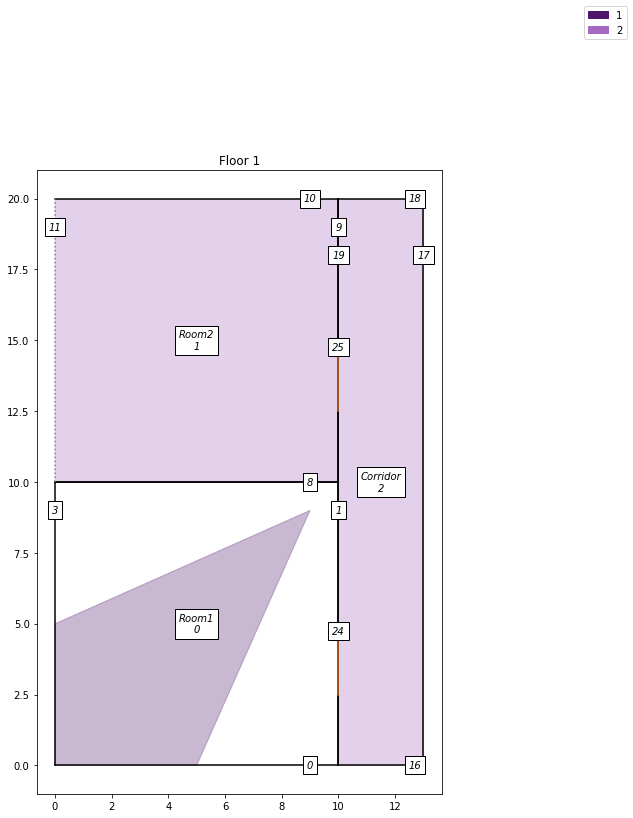

In [13]:
building.add_composite_zone(1, zones=0)
building.visualize()

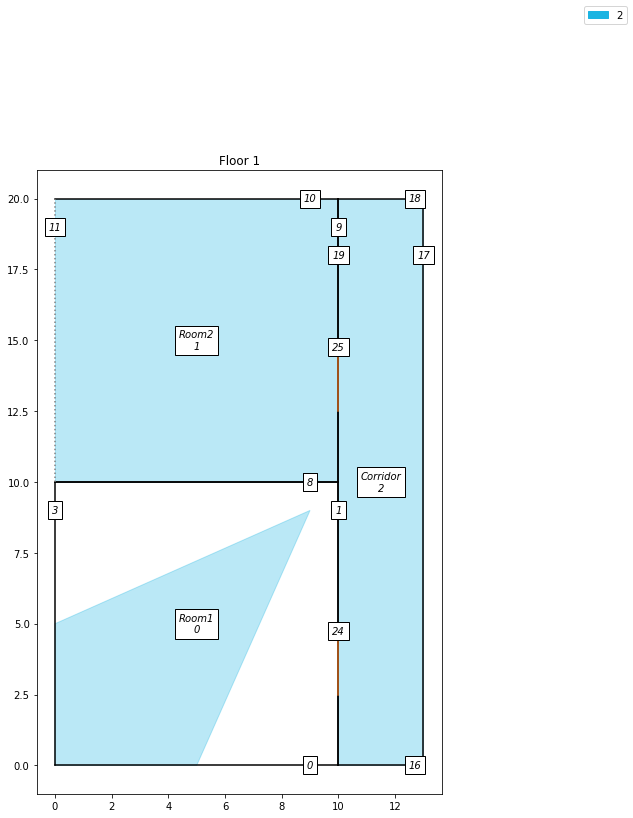

In [14]:
building.merge_zone(1, zone=1, composite_zone=2)
building.visualize()

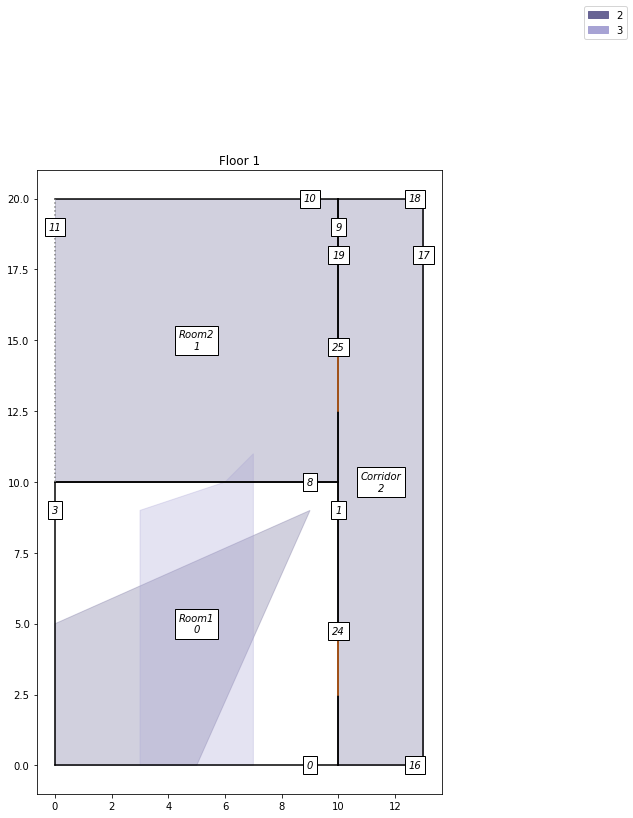

In [15]:
building.add_atomic_zone(1, polygon=[P(3,0),P(7,0),P(7,11),P(6,10),P(3,9)])
building.visualize()

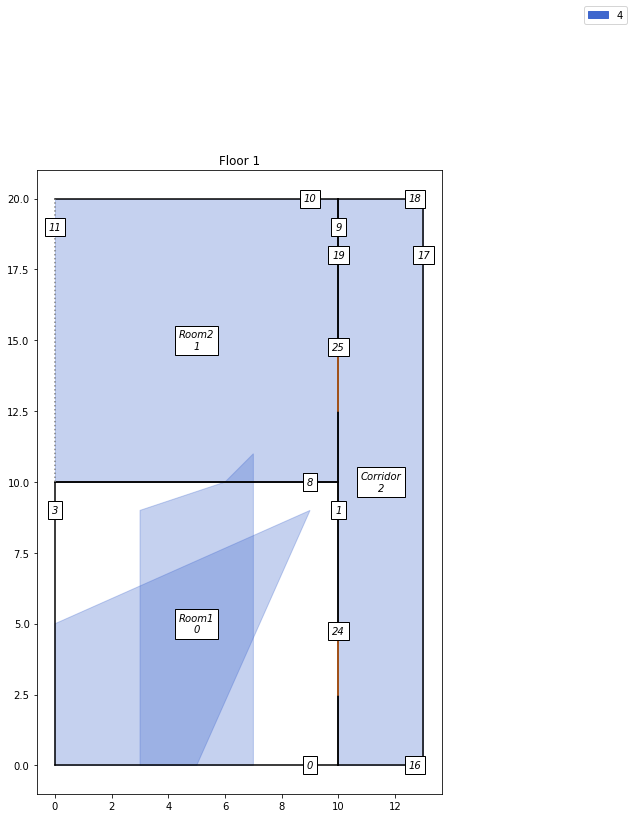

In [16]:
building.add_composite_zone(1, [2,3])
building.visualize()

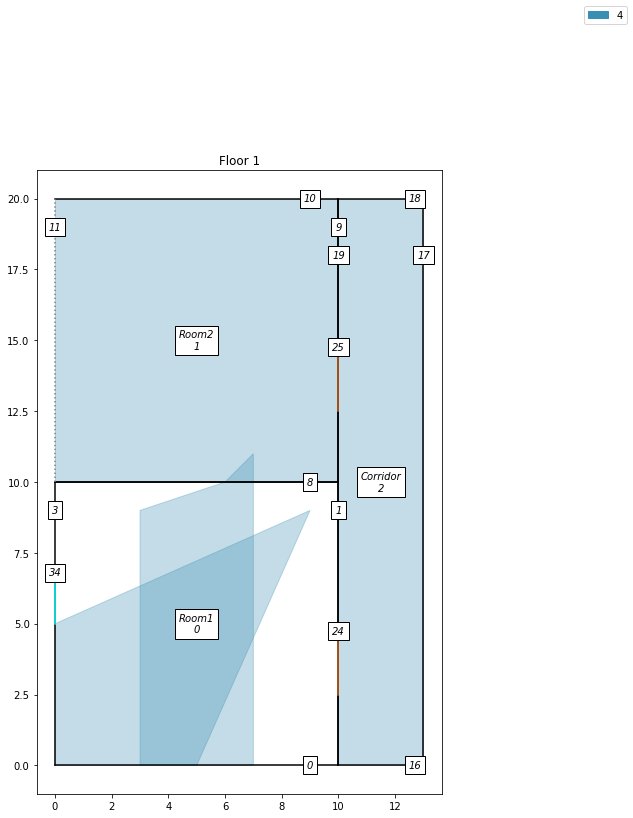

In [17]:
building.add_window(1, 3, P(0,5), P(0,7))
building.visualize()

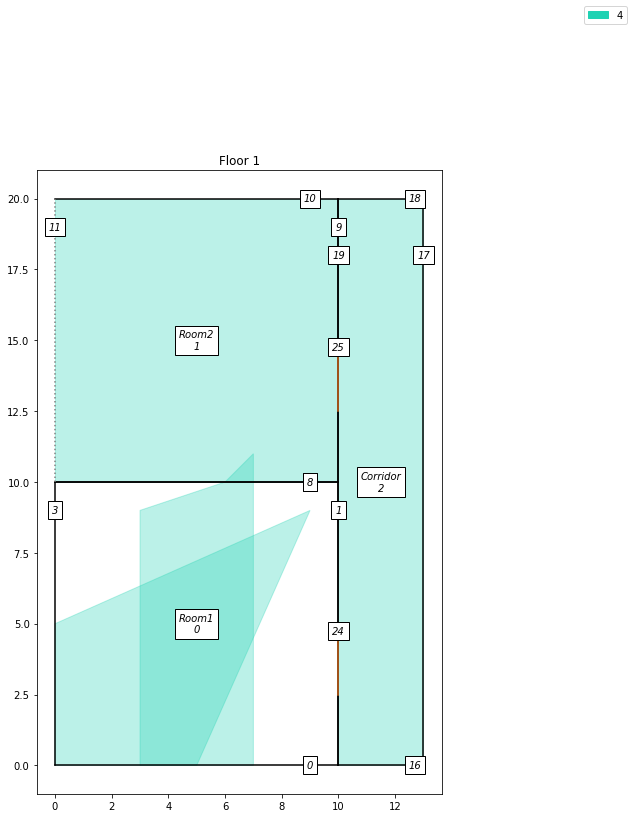

In [18]:
building.remove_window(1, 34)
building.visualize()

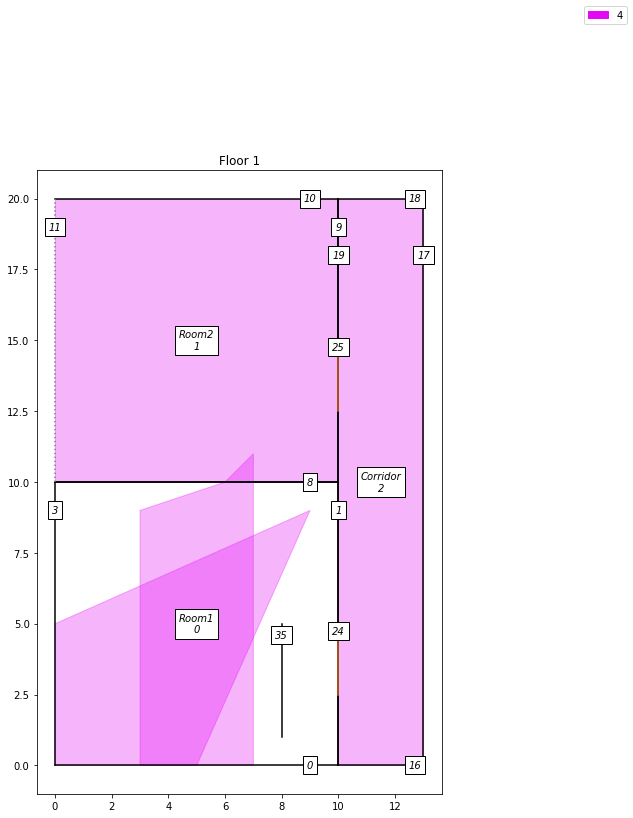

In [19]:
building.add_wall(1, P(8,1), P(8, 5))
building.visualize()

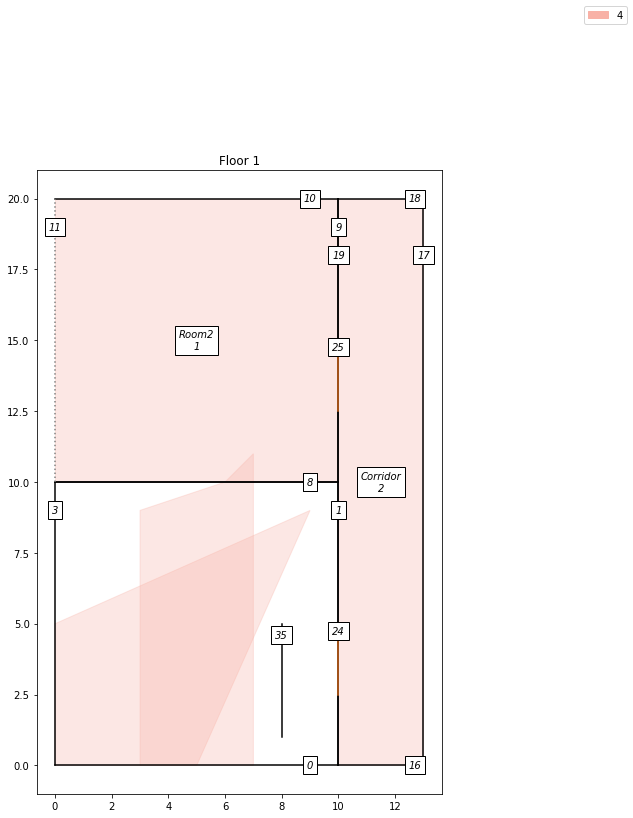

In [20]:
building.remove_area(1, 0)
building.visualize()

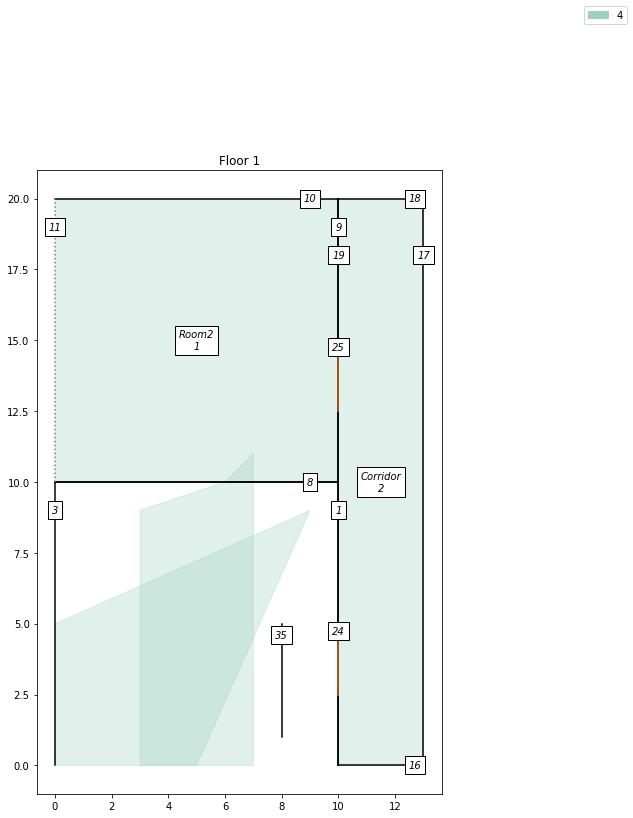

In [21]:
# building.remove_area(1, 2) 
building.remove_wall(1, 0)
building.visualize()

In [22]:
# building.remove_wall(1, 16)

In [23]:
# building.remove_area(1, 2)

In [24]:
n = 500
x = 15*np.random.rand(n)
y = 20*np.random.rand(n)
data = np.zeros((n,3))
for i in range(n):
    data[i,0] = i
    data[i,1] = x[i]
    data[i,2] = y[i]

building.visualize_clusters(1, data, 4)

ValueError: n_samples=2 should be >= n_clusters=4.

## Self-assessment <a class="anchor" id="self_assessment"></a>

#### Git

[x] I use git to store (only) the source code of my project.

[x] I configured the git `.ignore` file.

[x] I made a commit per atomic change to the file of the project.

[x] I use meaningful commit message by following guidelines.

Example : 
![git_branch_3](img/branch_3.png)
![git_branch_2](img/branch_2.png)
![git_branch_1](img/branch_1.png)


[x] Both me and my pair are contributing to a shared repository.


#### Python programming

[x] I use object-oriented Python to develop my project. 

[x] I document the code of my project.

[ ] I document the project itself.


#### Test-driven development

[x] I include some tests with my project. 

![tests](img/tests.png)

[ ] My tests cover all the source code developed.

[ ] I apply principles of TDD to develop my code.


#### Software architecture

[ ] I follow the clean code rules. 

[x] I use and document some design patterns in my project. Examples
